In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [5]:
df = pd.read_csv('../data/creditcard.csv')

In [7]:
X = df.drop('Class', axis=1)
y = df['Class']
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
input_dim = X_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoder = Dense(16, activation="relu")(input_layer)
encoder = Dense(8, activation="relu")(encoder)
decoder = Dense(16, activation='relu')(encoder)
decoder = Dense(input_dim, activation='linear')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

In [10]:
history = autoencoder.fit(
    X_scaled, X_scaled,
    epochs=50,
    batch_size=256,
    validation_split=0.2,
    shuffle=True,
    verbose=1
)

Epoch 1/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.8792 - val_loss: 0.6803
Epoch 2/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6180 - val_loss: 0.6303
Epoch 3/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5646 - val_loss: 0.5934
Epoch 4/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5418 - val_loss: 0.5803
Epoch 5/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5305 - val_loss: 0.5753
Epoch 6/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5271 - val_loss: 0.5697
Epoch 7/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5143 - val_loss: 0.5595
Epoch 8/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5001 - val_loss: 0.5535
Epoch 9/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4979 - val_loss: 0.5478
Epoch 10/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4886 - val_loss: 0.5493
Epoch 11/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4885 - val_loss: 0.5501
Epoch 12/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [11]:
X_pred = autoencoder.predict(X_scaled)
mse = np.mean(np.power(X_scaled - X_pred, 2), axis=1)

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 5s 568us/step


In [12]:
threshold = np.percentile(mse, 95)  # Top 5% reconstruction error = anomalies
print(f"Reconstruction error threshold: {threshold}")

Reconstruction error threshold: 1.0084882195763085


In [13]:
y_pred = (mse > threshold).astype(int)

In [14]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    284315
           1       0.02      0.62      0.04       492

    accuracy                           0.95    284807
   macro avg       0.51      0.79      0.51    284807
weighted avg       1.00      0.95      0.97    284807



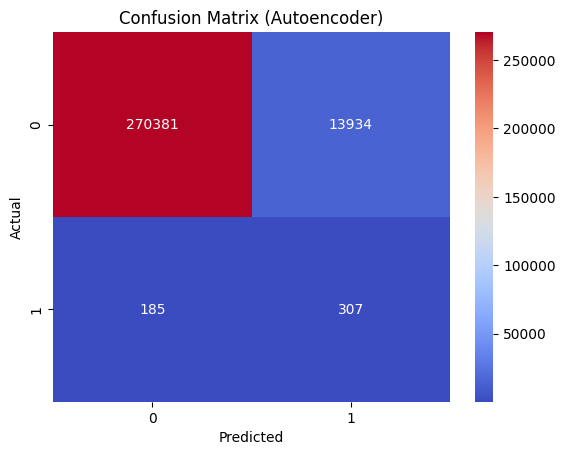

In [15]:
conf_matrix = confusion_matrix(y, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix (Autoencoder)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
import joblib
autoencoder.save('../models/autoencoder_model.h5')
joblib.dump(scaler, '../models/autoencoder_scaler.pkl')

['../models/autoencoder_scaler.pkl']